# Pymaceuticals Inc.
---

### Analysis

- While 9 different drug regimens were tested, the results of mice treated with Capomulin and Ramicane greatly outperformed the overall cohort. Their median ending tumor volume were 38.1 and 36.6 mm3, respectively, which were significantly lower than the median. All other regimens ended with a median volume in the mid-fifties to mid-sixties. Considering this major difference in efficacy for this trial, I recommend Capomulin and Ramicane continue to further stages of testing. 

- While the effectiveness of Capomulin and Ramicane is a cause for optimism, the same cannot be said for the other regimens. The median tumor volume for the Placebo group was 62 mm3, which is within one or two standard errors for almost all of the other regimens. This means that any effect that these treatments had can easily be explained by variance. A notable exception is the Propriva regimen. With a median tumor volume about 4 standard errors away from placebo, it appears likely this had a positive albeit relatively minor effect on the treatment group. (For comparison's sake, the top two regimens were separated by about 22 sampling errors from the placebo cohort in terms of tumor volume.) 

- By checking correlations of several paremeters, the weight of the mice is heavily correlated is heavily correlated with the volume of their tumors (.877 coefficient). Thus, an increased presence of tumors has a measured impact on a carrier's weight. While far from foolproof, this means changes in a carrier's weight could be indicative of a change in tumor volume. This could prove helpful since measuring the weight of a carrier is much easier than measuring the volume of a tumor inside a carrier.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
df = pd.merge(mouse_metadata, study_results, how="inner")
# Display the data table for preview
df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
mice_number = len(df['Mouse ID'].unique())
mice_number

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dupe = df[df.duplicated(subset="Mouse ID", keep=False)]
dupe['Mouse ID'].unique()

array(['k403', 's185', 'x401', 'm601', 'g791', 's508', 'f966', 'm546',
       'z578', 'j913', 'u364', 'n364', 'y793', 'r554', 'm957', 'c758',
       't565', 'a644', 'i177', 'j989', 'i738', 'a520', 'w914', 'r811',
       'g288', 'i334', 'q610', 'd251', 'l897', 'c458', 'b742', 'b128',
       'j246', 'a411', 'j119', 'w150', 'v923', 'g316', 's710', 'l509',
       'r944', 'e662', 'u196', 'q597', 'a444', 'i557', 'r921', 'w678',
       'y449', 'a203', 'a251', 'a262', 'a275', 'a366', 'a401', 'a457',
       'a492', 'a577', 'a685', 'a699', 'a788', 'a818', 'a897', 'a963',
       'b313', 'b487', 'b559', 'b759', 'b879', 'c139', 'c264', 'c282',
       'c302', 'c326', 'c402', 'c559', 'c580', 'c757', 'c766', 'c819',
       'c832', 'c895', 'c927', 'd164', 'd474', 'e213', 'e227', 'e291',
       'e476', 'e584', 'f129', 'f234', 'f278', 'f345', 'f394', 'f436',
       'f545', 'f993', 'g107', 'g296', 'g497', 'g558', 'g570', 'g867',
       'g989', 'h246', 'h333', 'h531', 'i386', 'i477', 'i635', 'i669',
      

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
df2 = df.drop_duplicates (subset="Mouse ID",keep='last')
df2

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
9,k403,Ramicane,Male,21,16,45,22.050126,1
19,s185,Capomulin,Female,3,17,45,23.343598,1
29,x401,Capomulin,Female,16,15,45,28.484033,0
39,m601,Capomulin,Male,22,17,45,28.430964,1
49,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
1859,z314,Stelasyn,Female,21,28,5,45.934712,0
1862,z435,Propriva,Female,12,26,10,48.710661,0
1872,z581,Infubinol,Female,24,25,45,62.754451,3
1882,z795,Naftisol,Female,13,29,45,65.741070,3


In [6]:
# Checking the number of mice in the clean DataFrame.
mice_number2 = len(df2['Mouse ID'])
mice_number2




249

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
dfmean = df2.groupby(["Drug Regimen"]).mean().reset_index()
dfmedian =df2.groupby(["Drug Regimen"]).median().reset_index()
dfvar = df2.groupby(["Drug Regimen"]).var().reset_index()
dfstd = df2.groupby(["Drug Regimen"]).std().reset_index()
dfsem = df2.groupby(["Drug Regimen"]).sem().reset_index()
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame
dfstat1 = dfmean[["Drug Regimen","Tumor Volume (mm3)"]]
dfstat2 = dfmedian[["Tumor Volume (mm3)"]]
dfstat3 = dfvar[["Tumor Volume (mm3)"]]
dfstat4 = dfstd[["Tumor Volume (mm3)"]]
dfstat5 = dfsem[["Tumor Volume (mm3)"]]
dfstats = pd.concat([dfstat1,dfstat2,dfstat3,dfstat4,dfstat5],axis=1)
dfstats.columns = ['Drug Regimen','Mean Tumor Volume', 'Median Tumor Volume', 'Tumor Volume Variance','Tumor Volume Std. Dev.', 'Tumor Volume Std. Err.']
dfstats


,Drug Regimen,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
0,Capomulin,36.667568,38.125164,32.663378,5.715188,1.143038
1,Ceftamin,57.753977,59.851956,69.982735,8.365568,1.673114
2,Infubinol,58.178246,60.165180,74.010875,8.602957,1.720591
3,Ketapril,62.806191,64.487812,98.921330,9.945920,1.989184
4,Naftisol,61.205757,63.283288,106.029927,10.297083,2.059417
5,Placebo,60.508414,62.030594,78.759797,8.874672,1.774934
6,Propriva,56.736964,55.841410,69.349002,8.327605,1.665521
7,Ramicane,36.191390,36.561652,32.166354,5.671539,1.134308
8,Stelasyn,61.001707,62.192350,90.331586,9.504293,1.940056
9,Zoniferol,59.181258,61.840058,76.862027,8.767099,1.753420


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.


## Bar and Pie Charts

<AxesSubplot: title={'center': 'Total Timepoints of All Mice Tested'}, xlabel='Drug Regimen', ylabel='Number of Mice Tested'>

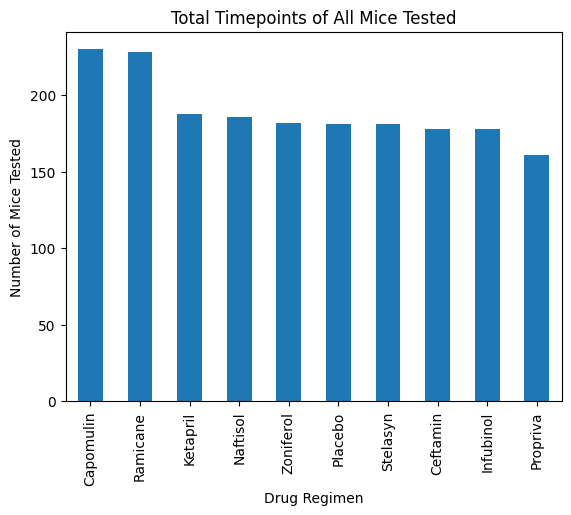

In [95]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
counting = df.value_counts(subset="Drug Regimen")
counting.plot.bar(title= "Total Timepoints of All Mice Tested", ylabel='Number of Mice Tested')


<BarContainer object of 10 artists>

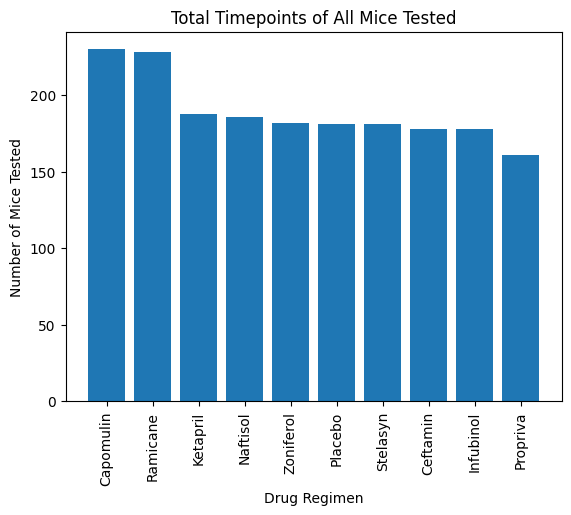

In [85]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
barplotpy = plt.bar(counting.index,counting.values)
plt.xlabel("Drug Regimen") 
plt.ylabel("Number of Mice Tested") 
plt.title("Total Timepoints of All Mice Tested")
plt.xticks(rotation = 90)
barplotpy

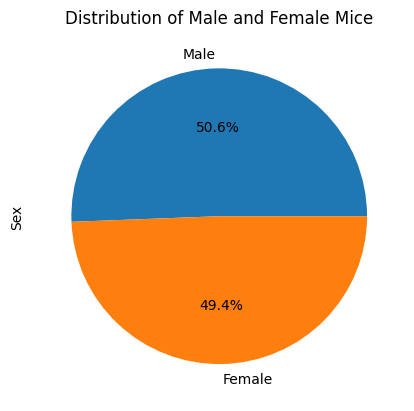

In [94]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sexcount = df.value_counts(subset="Sex")
plot = sexcount.plot.pie(title="Distribution of Male and Female Mice", ylabel="Sex",autopct='%1.1f%%')

Text(0.5, 1.0, 'Distribution of Male and Female Mice')

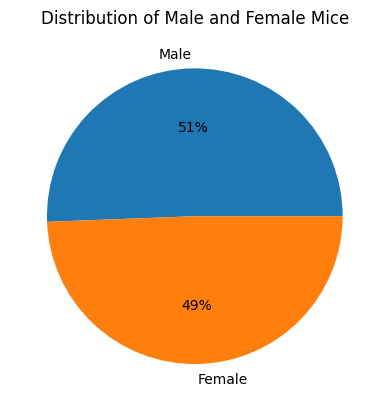

In [91]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = 'Male','Female'
pieply = plt.pie(sexcount, labels=labels, autopct='%.0f%%')
plt.title("Distribution of Male and Female Mice")

## Quartiles, Outliers and Boxplots

In [84]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

for index, row in df2.iterrows():
     print (row['Drug Regimen']) 

for index, row in df2.iterrows():
    if row['Drug Regimen'] == treatments [0]:
        treatmentvalues[0].append ((row['Tumor Volume (mm3)']))
    elif row['Drug Regimen'] == treatments [1]:
        treatmentvalues[1].append ((row['Tumor Volume (mm3)']))
    elif row['Drug Regimen'] == treatments [2]:
        treatmentvalues[2].append ((row['Tumor Volume (mm3)']))
    elif row['Drug Regimen'] == treatments [3]:
        treatmentvalues[3].append ((row['Tumor Volume (mm3)']))
        
treatmentvalues
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
# df2 already sorts the data in this manner.

Ramicane
Capomulin
Capomulin
Capomulin
Ramicane
Ramicane
Capomulin
Ramicane
Ramicane
Ramicane
Capomulin
Ramicane
Capomulin
Capomulin
Capomulin
Ramicane
Capomulin
Ramicane
Ramicane
Ramicane
Capomulin
Ramicane
Capomulin
Ramicane
Capomulin
Ramicane
Ramicane
Ramicane
Capomulin
Ramicane
Capomulin
Capomulin
Capomulin
Ramicane
Capomulin
Capomulin
Capomulin
Capomulin
Capomulin
Capomulin
Capomulin
Ramicane
Ramicane
Ramicane
Ramicane
Capomulin
Ramicane
Ramicane
Ramicane
Infubinol
Infubinol
Placebo
Ceftamin
Stelasyn
Zoniferol
Ketapril
Stelasyn
Infubinol
Infubinol
Propriva
Zoniferol
Naftisol
Placebo
Stelasyn
Zoniferol
Ceftamin
Ceftamin
Naftisol
Ceftamin
Stelasyn
Infubinol
Zoniferol
Placebo
Zoniferol
Infubinol
Stelasyn
Zoniferol
Ketapril
Placebo
Placebo
Ketapril
Ketapril
Infubinol
Propriva
Zoniferol
Zoniferol
Ketapril
Naftisol
Placebo
Naftisol
Infubinol
Naftisol
Zoniferol
Stelasyn
Ketapril
Infubinol
Zoniferol
Ceftamin
Zoniferol
Ketapril
Naftisol
Ketapril
Zoniferol
Ketapril
Propriva
Propriva
Stelasy

[[23.34359787,
  28.48403281,
  28.43096411,
  30.48598484,
  31.02392294,
  31.8962384,
  32.37735684,
  33.32909778,
  34.45529799,
  37.31184577,
  36.04104736,
  37.07402422,
  38.84687569,
  38.93963263,
  38.98287774,
  38.75326548,
  38.1251644,
  39.95234669,
  40.65812366,
  40.1592203,
  40.72857787,
  41.48300765,
  41.58152074,
  47.68596303,
  46.53920617,
  23.34359787,
  28.48403281,
  28.43096411,
  30.48598484,
  31.02392294,
  31.8962384,
  32.37735684,
  33.32909778,
  34.45529799,
  37.31184577,
  36.04104736,
  37.07402422,
  38.84687569,
  38.93963263,
  38.98287774,
  38.75326548,
  38.1251644,
  39.95234669,
  40.65812366,
  40.1592203,
  40.72857787,
  41.48300765,
  41.58152074,
  47.68596303,
  46.53920617],
 [22.05012627,
  29.12847181,
  30.27623175,
  30.56462509,
  30.63869575,
  31.56046955,
  31.09533505,
  33.39765251,
  32.97852192,
  33.56240217,
  36.13485243,
  38.81036633,
  37.22565033,
  36.37451039,
  36.56165229,
  37.31123552,
  38.34200823,


In [23]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
treatments



# Create empty list to fill with tumor vol data (for plotting)
treatmentvalues = [[],[],[],[]]
for index, row in df2.iterrows():
    if row['Drug Regimen'] == treatments [0]:
        treatmentvalues[0].append ((row['Tumor Volume (mm3)']))
    elif row['Drug Regimen'] == treatments [1]:
        treatmentvalues[1].append ((row['Tumor Volume (mm3)']))
    elif row['Drug Regimen'] == treatments [2]:
        treatmentvalues[2].append ((row['Tumor Volume (mm3)']))
    elif row['Drug Regimen'] == treatments [3]:
        treatmentvalues[3].append ((row['Tumor Volume (mm3)']))
        
capomulin_float = [float(i) for i in treatmentvalues[0]]
ramicane_float = [float(i) for i in treatmentvalues[1]]
infubinol_float = [float(i) for i in treatmentvalues[2]]
certamin_float = [float(i) for i in treatmentvalues[3]]

lowerq1 = np.percentile(capomulin_float,25)
median1 = np.percentile(capomulin_float,50)
upperq1 = np.percentile(capomulin_float,75)
iqr1 = upperq1-lowerq1
upperoutlier1 = upperq1+iqr1
loweroutlier1 = lowerq1-iqr1

for i in capomulin_float:
    if i > upperoutlier1 or i < loweroutlier1:
        print (f"{i}is an outlier for Capomulin.")
        
lowerq2 = np.percentile(ramicane_float,25)
median2 = np.percentile(ramicane_float,50)
upperq2 = np.percentile(ramicane_float,75)
iqr2 = upperq2-lowerq2
upperoutlier2 = upperq2+iqr2
loweroutlier2 = lowerq2-iqr2

for i in ramicane_float:
    if i > upperoutlier2 or i < loweroutlier2:
        print (f"{i}is an outlier for Ramicane.")
        
lowerq3 = np.percentile(infubinol_float,25)
median3 = np.percentile(infubinol_float,50)
upperq3 = np.percentile(infubinol_float,75)
iqr3 = upperq3-lowerq3
upperoutlier3 = upperq3+iqr3
loweroutlier3 = lowerq3-iqr3

for i in infubinol_float:
    if i > upperoutlier3 or i < loweroutlier3:
        print (f"{i}is an outlier for Infubinol.")
        
lowerq4 = np.percentile(certamin_float,25)
median4 = np.percentile(certamin_float,50)
upperq4 = np.percentile(certamin_float,75)
iqr4 = upperq4-lowerq4
upperoutlier4 = upperq4+iqr4
loweroutlier4 = lowerq4-iqr4

for i in certamin_float:
    if i > upperoutlier3 or i < loweroutlier3:
        print (f"{i}is an outlier for Certamin.")

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

23.34359787is an outlier for Capomulin.
22.05012627is an outlier for Ramicane.
36.3213458is an outlier for Infubinol.


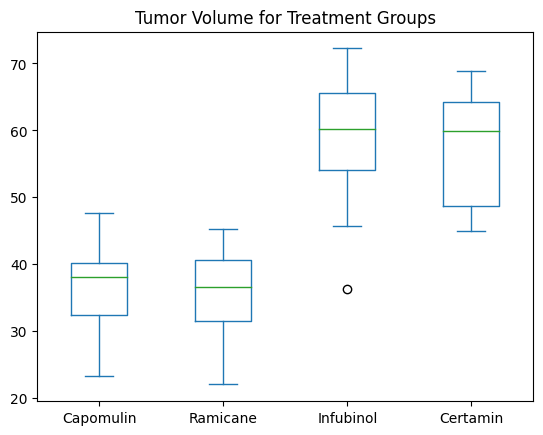

In [40]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

dftreat = pd.DataFrame ({"Capomulin": capomulin_float, "Ramicane": ramicane_float, "Infubinol": infubinol_float,
                        "Certamin": certamin_float})
ax = dftreat.plot(kind='box', title='Tumor Volume for Treatment Groups')

## Line and Scatter Plots

Text(0.5, 1.0, 'Capomulin Treatment of Mouse s185')

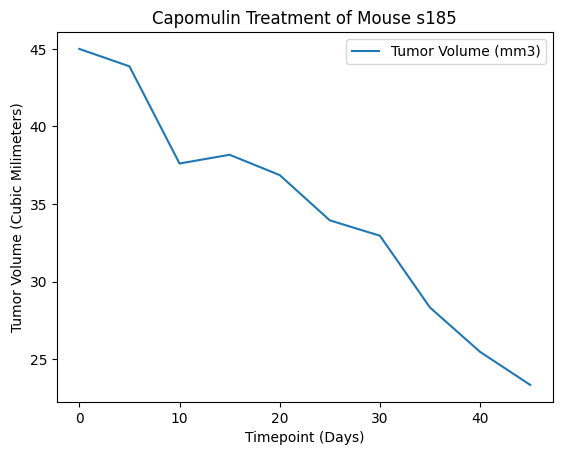

In [41]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
dfs185 = df[(df['Mouse ID'] == 's185')]
dfs185.plot.line(x='Timepoint',y='Tumor Volume (mm3)')
plt.xlabel("Timepoint (Days)")
plt.ylabel("Tumor Volume (Cubic Milimeters)")
plt.title("Capomulin Treatment of Mouse s185")

Text(0.5, 1.0, 'Average Tumor Volume vs. Mouse Weight')

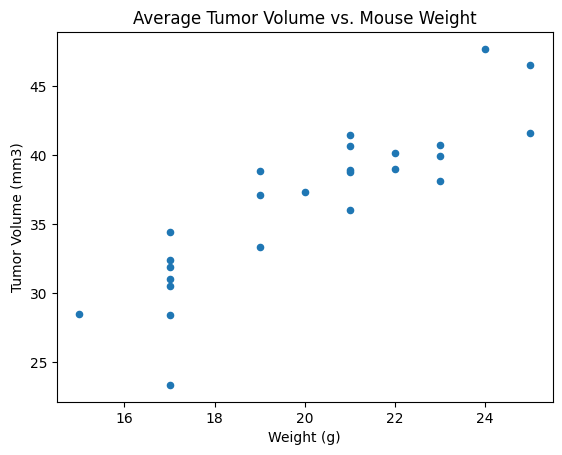

In [83]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
dfCapomulin = df2[(df2['Drug Regimen'] == 'Capomulin')]
dfCapomulin.plot.scatter(x='Weight (g)',y='Tumor Volume (mm3)')
plt.title("Average Tumor Volume vs. Mouse Weight")



## Correlation and Regression

The correlation between mouse wieght and the average tumor volume is 0.877.


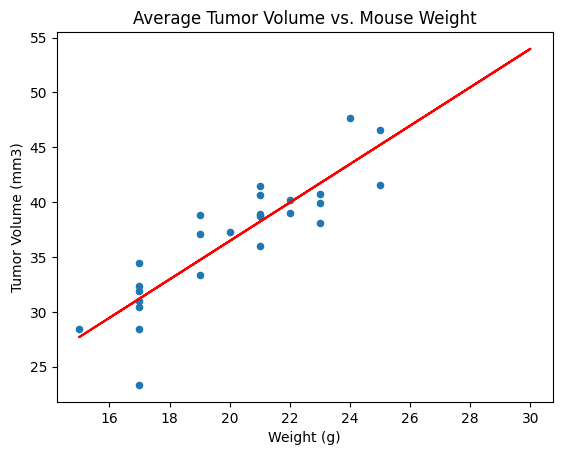

In [81]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
dfCapomulin.plot.scatter(x='Weight (g)',y='Tumor Volume (mm3)')
plt.title("Average Tumor Volume vs. Mouse Weight")
dfcorrelation = dfCapomulin.corr()
dfcorrelation
cap_slope, cap_int, cap_r, cap_p, cap_std_err = st.linregress(dfCapomulin['Weight (g)'], dfCapomulin['Tumor Volume (mm3)'])
cap_fit = cap_slope * (df2['Weight (g)']) + cap_int
plt.plot(df2['Weight (g)'],cap_fit,color='Red')
print(f"The correlation between mouse wieght and the average tumor volume is {round(dfcorrelation.iloc[1,3],3)}.")